In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import butter, lfilter, sosfilt, sosfreqz


# Define a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    """
    Design a bandpass filter.
    Args:
        lowcut: Lower cutoff frequency (Hz).
        highcut: Higher cutoff frequency (Hz).
        fs: Sampling frequency (Hz).
        order: Filter order (higher = steeper filter response).
    Returns:
        sos: Second-order sections representation of the filter.
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Apply a bandpass filter to data.
    Args:
        data: Input signal (1D array).
        lowcut: Lower cutoff frequency (Hz).
        highcut: Higher cutoff frequency (Hz).
        fs: Sampling frequency (Hz).
        order: Filter order (higher = steeper filter response).
    Returns:
        Filtered signal (1D array).
    """
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered = sosfilt(sos, data)
    return filtered

In [2]:
directory = r"D:/MDSI_project/PCE_surrogate/InputData/Realization_frf_noSSI/"
num_doe = 1000

# Load the JSON file
with open('lhs_data.json', 'r') as json_file:
    loaded_data = json.load(json_file)

# Convert back to a NumPy array if needed
X = np.array(loaded_data)
X = np.delete(X, [15, 16], axis=1)

#with open(os.path.join(directory, "DOE_result_0.json"), 'r') as json_file:
#    loaded_data = json.load(json_file)
#    freq = np.array(loaded_data['meas_frf']['disp_ch9']['freq'])

freq_resample = np.linspace(0, 50, 101)
FRFs_simu = np.zeros([np.shape(X)[0],24,len(freq_resample)])


directory = r"D:/MDSI_project/PCE_surrogate/InputData/Realization_frf_noSSI/"
for i_doe in range(num_doe):
    filename = f"DOE_result_{i_doe}.json"
    full_path = os.path.join(directory, filename)
    i_ch_index = 0
    ch_list = [9,10,11,12,3,13,14,15]

    with open(full_path, 'r') as json_file:
        loaded_data = json.load(json_file)

    for i_ch in ch_list:
        imag_FRF = np.interp(freq_resample, np.array(loaded_data['meas_frf'][f'disp_ch{i_ch}']['freq']), np.array(loaded_data['meas_frf'][f'disp_ch{i_ch}']['imag']).reshape(-1))
        FRFs_simu[i_doe,i_ch_index,:] = imag_FRF
        
        i_ch_index = i_ch_index +1

directory = r"D:/MDSI_project/PCE_surrogate/InputData/Realization_frf_noSSI_ex220/"
for i_doe in range(num_doe):
    filename = f"DOE_result_{i_doe}.json"
    full_path = os.path.join(directory, filename)
    i_ch_index = 8
    ch_list = [9,10,11,12,3,13,14,15]

    with open(full_path, 'r') as json_file:
        loaded_data = json.load(json_file)

    for i_ch in ch_list:
        imag_FRF = np.interp(freq_resample, np.array(loaded_data['meas_frf'][f'disp_ch{i_ch}']['freq']), np.array(loaded_data['meas_frf'][f'disp_ch{i_ch}']['imag']).reshape(-1))
        FRFs_simu[i_doe,i_ch_index,:] = imag_FRF
        i_ch_index = i_ch_index +1

directory = r"D:/MDSI_project/PCE_surrogate/InputData/Realization_frf_noSSI_ex221/"
for i_doe in range(num_doe):
    filename = f"DOE_result_{i_doe}.json"
    full_path = os.path.join(directory, filename)
    i_ch_index = 16
    ch_list = [9,10,11,12,3,13,14,15]

    with open(full_path, 'r') as json_file:
        loaded_data = json.load(json_file)

    for i_ch in ch_list:
        imag_FRF = np.interp(freq_resample, np.array(loaded_data['meas_frf'][f'disp_ch{i_ch}']['freq']), np.array(loaded_data['meas_frf'][f'disp_ch{i_ch}']['imag']).reshape(-1))
        FRFs_simu[i_doe,i_ch_index,:] = imag_FRF
        i_ch_index = i_ch_index +1

            # Split into 3 groups of [8, 101]
    num_groups = 3
    group_size = 8
    normalized_data = np.zeros_like(FRFs_simu)
    #

    


In [3]:

freq_resample = np.linspace(0, 50, 101)
FRFs_exp = np.zeros([24,len(freq_resample)])

i_pos_1OG = [9,10,11,12,3,13,14,15]
cut_freq_low = 8
cut_freq_high = 50

i_file = 13
directory = r"D:/MDSI_project/MATLAB/Surrogate_main/FRF"
for i in range(len(i_pos_1OG)):
    i_pos = i_pos_1OG[i]
    filename = f"FRF_test_{i_file}_ch_{i_pos}.mat"
    full_path = os.path.join(directory, filename)
    frf_data = sio.loadmat(full_path)
    f = np.array([frf_data["freq_"]])[0]
    #r = np.array([frf_data["real_"]])[0]
    imag = np.array([frf_data["imag_"]])[0]
    indices = np.where((f >= cut_freq_low ) & (f <= cut_freq_high))[0]
    indices_cutoff_high = np.where((f >= 35 ))[0]
    id_last = indices[-1] 
    id_start = indices[0] 
    f = f[0:id_last]
    #r = r[0:id_last]
    imag = imag[0:id_last]
    imag[0: id_start] = 0
    imag[indices_cutoff_high[0]:id_last] = 0
    i_resample = np.interp(freq_resample, f.reshape(-1), imag.reshape(-1))
    FRFs_exp[i,:] = i_resample

i_file = 1
directory = r"D:/MDSI_project/MATLAB/Surrogate_main/FRF"
for i in range(len(i_pos_1OG)):
    i_pos = i_pos_1OG[i]
    filename = f"FRF_test_{i_file}_ch_{i_pos}.mat"
    full_path = os.path.join(directory, filename)
    frf_data = sio.loadmat(full_path)
    f = np.array([frf_data["freq_"]])[0]
    #r = np.array([frf_data["real_"]])[0]
    imag = np.array([frf_data["imag_"]])[0]
    indices = np.where((f >= cut_freq_low ) & (f <= cut_freq_high))[0]
    indices_cutoff_high = np.where((f >= 35 ))[0]
    id_last = indices[-1] 
    id_start = indices[0] 
    f = f[0:id_last]
    #r = r[0:id_last]
    imag = imag[0:id_last]
    imag[0: id_start] = 0
    imag[indices_cutoff_high[0]:id_last] = 0
    i_resample = np.interp(freq_resample, f.reshape(-1), imag.reshape(-1))
    FRFs_exp[i+8,:] = i_resample

i_file = 9
directory = r"D:/MDSI_project/MATLAB/Surrogate_main/FRF"
for i in range(len(i_pos_1OG)):
    i_pos = i_pos_1OG[i]
    filename = f"FRF_test_{i_file}_ch_{i_pos}.mat"
    full_path = os.path.join(directory, filename)
    frf_data = sio.loadmat(full_path)
    f = np.array([frf_data["freq_"]])[0]
    #r = np.array([frf_data["real_"]])[0]
    imag = np.array([frf_data["imag_"]])[0]
    indices = np.where((f >= cut_freq_low ) & (f <= cut_freq_high))[0]
    indices_cutoff_high = np.where((f >= 35 ))[0]
    id_last = indices[-1] 
    id_start = indices[0] 
    f = f[0:id_last]
    #r = r[0:id_last]
    imag = imag[0:id_last]
    imag[0: id_start] = 0
    imag[indices_cutoff_high[0]:id_last] = 0
    i_resample = np.interp(freq_resample, f.reshape(-1), imag.reshape(-1))
    FRFs_exp[i+16,:] = i_resample

# Split into 3 groups of [8, 101]
num_groups = 3
group_size = 8
normalized_data = np.zeros_like(FRFs_exp)
#
for i in range(num_groups):
    # Get the current group
    start_idx = i * group_size
    end_idx = start_idx + group_size
    group = FRFs_exp[start_idx:end_idx, :]  # Shape: [8, 101]
    # Compute normalization value (e.g., max of the group)
    normalization_value = np.max(group)
    # Normalize the group
    normalized_data[start_idx:end_idx, :] = group / normalization_value
#FRFs_simu_norm = FRFs_simu/np.max(np.abs(FRFs_simu))
FRFs_exp_norm = normalized_data
#FRFs_exp_norm = FRFs_exp/np.max(np.abs(FRFs_exp))


[[35.65470464]
 [55.95695981]
 [28.09031327]
 [44.20230637]
 [26.11708713]
 [24.20343129]
 [22.9933834 ]
 [56.41423027]
 [61.36069151]
 [58.63425681]
 [31.43725639]
 [20.75101231]
 [41.22490055]
 [27.05725274]
 [21.54357173]
 [32.70892104]
 [45.34508624]
 [42.81785606]
 [23.0027817 ]
 [37.12801396]
 [21.81519796]
 [50.81707033]
 [40.84034801]
 [21.27628425]
 [20.08377937]
 [21.31718835]
 [38.09828692]
 [40.02365278]
 [23.96144347]
 [56.10244269]
 [19.16011441]
 [31.06135782]
 [37.74609099]
 [28.8784167 ]
 [37.01474584]
 [40.06604421]
 [27.62721124]
 [34.3839978 ]
 [20.51746641]
 [29.36403067]
 [36.11558956]
 [21.86417759]
 [28.81732763]
 [39.20245463]
 [42.09110839]
 [41.78882712]
 [20.83810639]
 [33.94397427]
 [43.20899578]
 [24.90875661]
 [27.17170596]
 [44.97319907]
 [26.01511125]
 [47.90890381]
 [37.90701178]
 [40.86711527]
 [22.15526412]
 [39.81449201]
 [36.35246806]
 [35.65515207]
 [23.20249063]
 [29.12059902]
 [24.06336454]
 [37.66423645]
 [35.15938342]
 [43.38497317]
 [40.22865

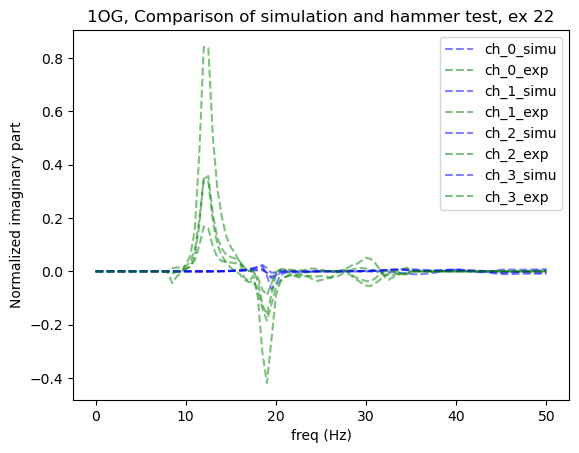

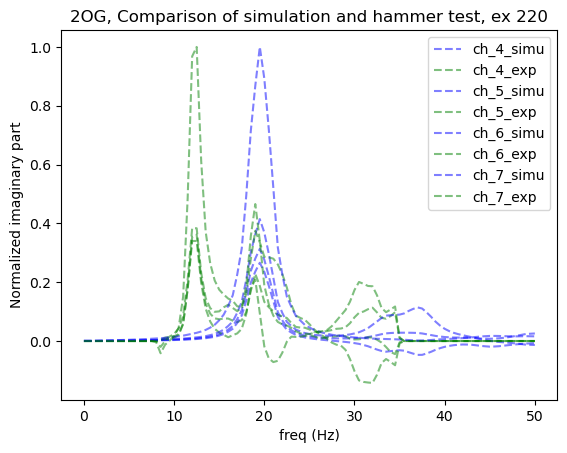

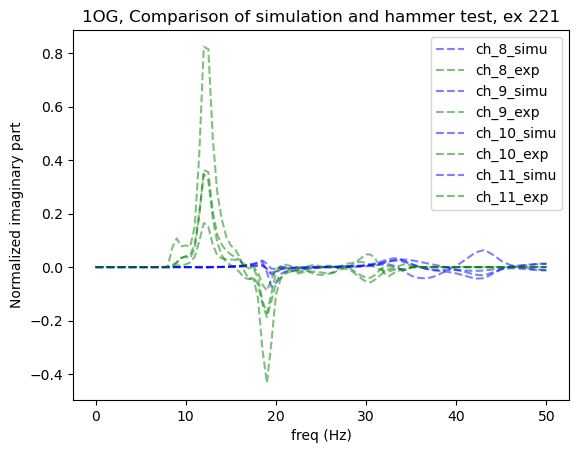

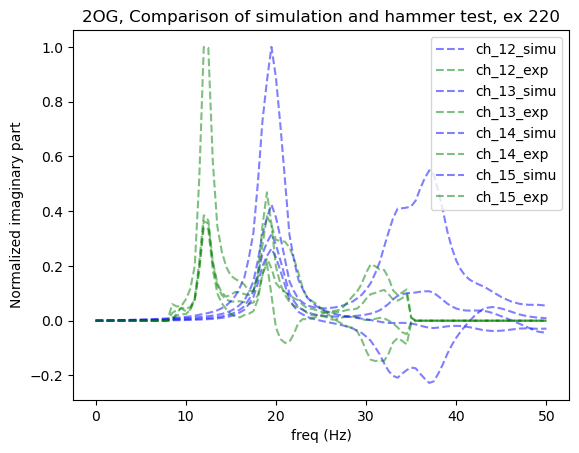

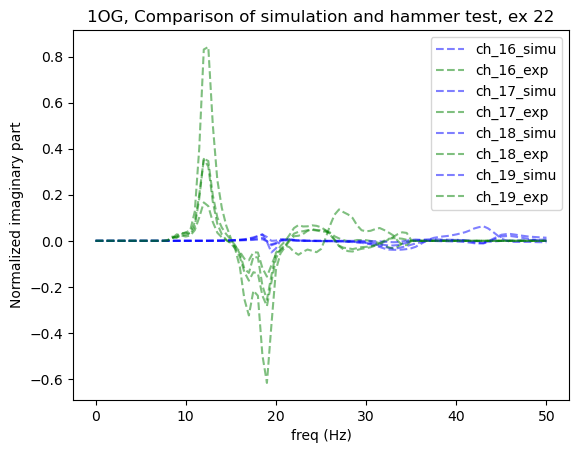

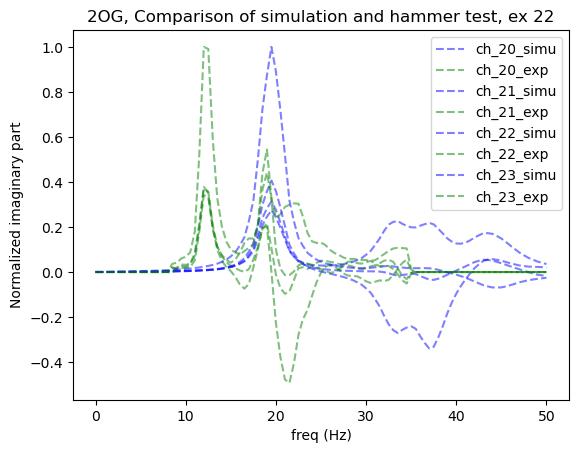

In [8]:
FRFs_simu_check = FRFs_simu[2,:,:]
num_groups = 3
group_size = 8
normalized_data = np.zeros_like(FRFs_exp)
for i in range(num_groups):
    # Get the current group
    start_idx = i * group_size
    end_idx = start_idx + group_size
    group = FRFs_simu_check[start_idx:end_idx, :]  # Shape: [8, 101]
    # Compute normalization value (e.g., max of the group)
    normalization_value = np.max(group)
    # Normalize the group
    normalized_data[start_idx:end_idx, :] = group / normalization_value
    #FRFs_simu_norm = FRFs_simu/np.max(np.abs(FRFs_simu))
    FRFs_simu_norm = normalized_data


error_all = 1000*np.ones([1000,1])
for i_DOE in range(0,1000):
    num_groups = 3
    group_size = 8
    normalized_data = np.zeros_like(FRFs_exp)
    FRFs_simu_check = FRFs_simu[i_DOE,:,:]
    for i in range(num_groups):
        # Get the current group
        start_idx = i * group_size
        end_idx = start_idx + group_size
        group = FRFs_simu_check[start_idx:end_idx, :]  # Shape: [8, 101]
        # Compute normalization value (e.g., max of the group)
        normalization_value = np.max(group)
        # Normalize the group
        normalized_data[start_idx:end_idx, :] = group / normalization_value
        #FRFs_simu_norm = FRFs_simu/np.max(np.abs(FRFs_simu))
        FRFs_simu_norm = normalized_data

    error_all[i_DOE] = np.sum(np.power(FRFs_simu_norm - FRFs_exp_norm,2))
print(error_all)


for i in range(0,4):
    plt.plot(freq_resample,FRFs_simu_norm[i,:], label=f"ch_{i}_simu",linestyle="--",color='blue', alpha=0.5)
    plt.plot(freq_resample,FRFs_exp_norm[i,:], label=f"ch_{i}_exp",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized imaginary part")
    plt.title("1OG, Comparison of simulation and hammer test, ex 22")
plt.show()
for i in range(4,8):
    plt.plot(freq_resample,FRFs_simu_norm[i,:], label=f"ch_{i}_simu",linestyle="--",color='blue', alpha=0.5)
    plt.plot(freq_resample,FRFs_exp_norm[i,:], label=f"ch_{i}_exp",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized imaginary part")
    plt.title("2OG, Comparison of simulation and hammer test, ex 220")
plt.show()
for i in range(8,12):
    plt.plot(freq_resample,FRFs_simu_norm[i,:], label=f"ch_{i}_simu",linestyle="--",color='blue', alpha=0.5)
    plt.plot(freq_resample,FRFs_exp_norm[i,:], label=f"ch_{i}_exp",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized imaginary part")
    plt.title("1OG, Comparison of simulation and hammer test, ex 221")
plt.show()
for i in range(12,16):
    plt.plot(freq_resample,FRFs_simu_norm[i,:], label=f"ch_{i}_simu",linestyle="--",color='blue', alpha=0.5)
    plt.plot(freq_resample,FRFs_exp_norm[i,:], label=f"ch_{i}_exp",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized imaginary part")
    plt.title("2OG, Comparison of simulation and hammer test, ex 220")
plt.show()
for i in range(16,20):
    plt.plot(freq_resample,FRFs_simu_norm[i,:], label=f"ch_{i}_simu",linestyle="--",color='blue', alpha=0.5)
    plt.plot(freq_resample,FRFs_exp_norm[i,:], label=f"ch_{i}_exp",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized imaginary part")
    plt.title("1OG, Comparison of simulation and hammer test, ex 22")
plt.show()
for i in range(20,24):
    plt.plot(freq_resample,FRFs_simu_norm[i,:], label=f"ch_{i}_simu",linestyle="--",color='blue', alpha=0.5)
    plt.plot(freq_resample,FRFs_exp_norm[i,:], label=f"ch_{i}_exp",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized imaginary part")
    plt.title("2OG, Comparison of simulation and hammer test, ex 22")
plt.show()


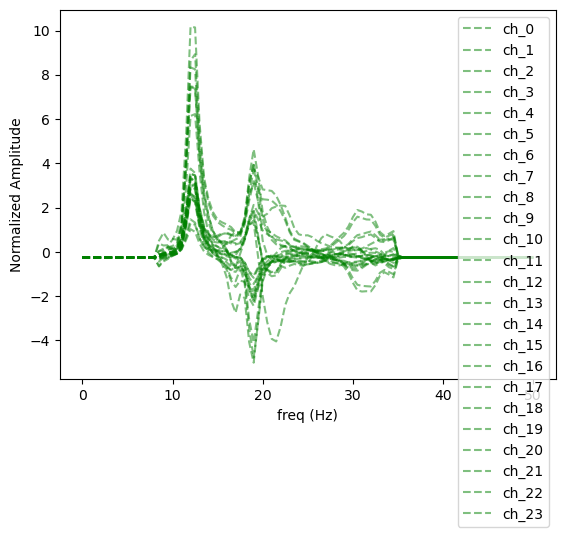

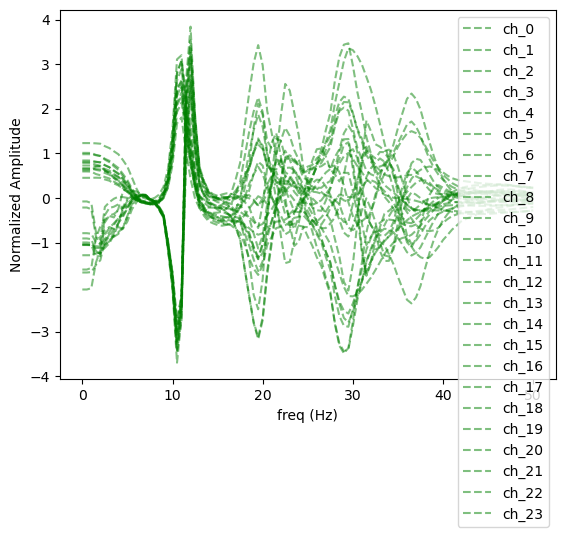

In [5]:
# 1. Load your data
# Assuming you have your LHS parameters and FRFs data
lhs_params = torch.tensor(X, dtype=torch.float32)  # Shape: [N, 20]
frfs_simulation = torch.tensor(FRFs_simu, dtype=torch.float32)  # Shape: [N, 24, 100]
frfs_experimental = torch.tensor(FRFs_exp, dtype=torch.float32)  # Shape: [24, 100]


frfs_simulation_mean = frfs_simulation.mean(dim=0)
frfs_simulation_std = frfs_simulation.std(dim=0)

frfs_experimental_mean = frfs_experimental.mean()
frfs_experimental_std = frfs_experimental.std()

frfs_simulation_normalized = (frfs_simulation - frfs_simulation_mean) / frfs_simulation_std
frfs_experimental_normalized = (frfs_experimental - frfs_experimental_mean) / frfs_experimental_std


for i in range(24):
    plt.plot(freq_resample,frfs_experimental_normalized.numpy()[i,:], label=f"ch_{i}",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized Amplitude")
plt.show()

for i in range(24):
    plt.plot(freq_resample,frfs_simulation_normalized.numpy()[10,i,:], label=f"ch_{i}",linestyle="--",color='green', alpha=0.5)
    plt.legend()
    plt.xlabel("freq (Hz)")
    plt.ylabel("Normalized Amplitude")
plt.show()



In [102]:
# 3. Flatten the FRFs for model output
# Transform [24, 100] to [2400]
frfs_simulation_normalized_flat = frfs_simulation_normalized.view(frfs_simulation_normalized.size(0), -1)

# 4. Create a dataset and dataloader
dataset = TensorDataset(lhs_params, frfs_simulation_normalized_flat)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

best_val_loss = float('inf')
patience = 50  # Stop after 50 epochs of no improvement
patience_counter = 0



# 5. Define the neural network
class FEMNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FEMNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize the model
input_dim = lhs_params.shape[1]  # 20 FEM parameters
output_dim = frfs_simulation_normalized_flat.shape[1]  # 24 * 100 = 2400
print(input_dim, output_dim)
model = FEMNet(input_dim, output_dim)

# 6. Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

# 7. Train the model
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    
    # Validate the model
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    scheduler.step(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset counter if validation loss improves
        # Save the model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print("Early stopping!")
        break

17 2424
Epoch 1/10000, Train Loss: 0.9519, Val Loss: 1.3085
Epoch 2/10000, Train Loss: 0.9508, Val Loss: 1.3077
Epoch 3/10000, Train Loss: 0.9502, Val Loss: 1.3071
Epoch 4/10000, Train Loss: 0.9495, Val Loss: 1.3064


KeyboardInterrupt: 

In [ ]:
frfs_simulation_normalized_flat = frfs_simulation_normalized.view(frfs_simulation_normalized.size(0), -1)
input_data = torch.full((1, 20), 0.5, dtype=torch.float32) 
# Define your model architecture (same as during training)
class FEMNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FEMNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize the model
input_dim = lhs_params.shape[1]  # 20 FEM parameters
output_dim = frfs_simulation_normalized_flat.shape[1]  # 24 * 100 = 2400
model = FEMNet(input_dim, output_dim)

# 2. Load the saved model state
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode





TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [11]:
frfs_experimental_normalized_flat = frfs_experimental_normalized.view(1, -1) 
# Initialize random input parameters to start the optimization process
predicted_params = torch.randn(1, input_dim, requires_grad=True)  # Shape: [1, 20]
optimizer = optim.Adam([predicted_params], lr=1e-4)

# Apply Sigmoid to constrain parameters to the range (0, 1)
def sigmoid_params(params):
    return torch.sigmoid(params)  # Sigmoid maps to (0, 1)

# Define the loss function (MSE between predicted FRFs and experimental FRFs)
criterion = nn.MSELoss()

# Optimization loop (gradient descent)
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zero the gradients

    # Apply the sigmoid function to keep parameters within range (0, 1)
    constrained_params = sigmoid_params(predicted_params)  # Shape: [1, 20]

    # Forward pass: Get predicted FRFs based on the constrained parameters
    predicted_frf = model(constrained_params)  # Predicted FRF from the current parameter guess

    # Calculate the loss between predicted and experimental FRFs
    loss = criterion(predicted_frf, frfs_experimental_normalized_flat)

    # Backward pass: Compute gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# After optimization, the predicted parameters will be the best fit for the experimental FRFs
final_predicted_params = sigmoid_params(predicted_params).detach().numpy()  # Apply sigmoid and convert to numpy for easier handling
print("Final Predicted Parameters (in range 0, 1):", final_predicted_params)

Epoch [100/1000], Loss: 1.0059
Epoch [200/1000], Loss: 1.0059
Epoch [300/1000], Loss: 1.0059
Epoch [400/1000], Loss: 1.0059
Epoch [500/1000], Loss: 1.0059
Epoch [600/1000], Loss: 1.0059
Epoch [700/1000], Loss: 1.0058
Epoch [800/1000], Loss: 1.0058
Epoch [900/1000], Loss: 1.0058
Epoch [1000/1000], Loss: 1.0058
Final Predicted Parameters (in range 0, 1): [[0.38440135 0.15540129 0.58844703 0.73964924 0.42940038 0.16268793
  0.4643669  0.7290096  0.40783325 0.9194054  0.29123878 0.9189456
  0.22060414 0.62576485 0.47972634 0.2660365  0.7254783 ]]


In [23]:
frfs_simulation_normalized_flat = frfs_simulation_normalized.view(frfs_simulation_normalized.size(0), -1)
input_data = torch.full((1, 20), 0.5, dtype=torch.float32) 
# Define your model architecture (same as during training)
class FEMNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(FEMNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize the model
input_dim = lhs_params.shape[1]  # 20 FEM parameters
output_dim = frfs_simulation_normalized_flat.shape[1]  # 24 * 100 = 2400
model = FEMNet(input_dim, output_dim)

# 2. Load the saved model state
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode

predicted_frf = model(sigmoid_params(predicted_params)) 

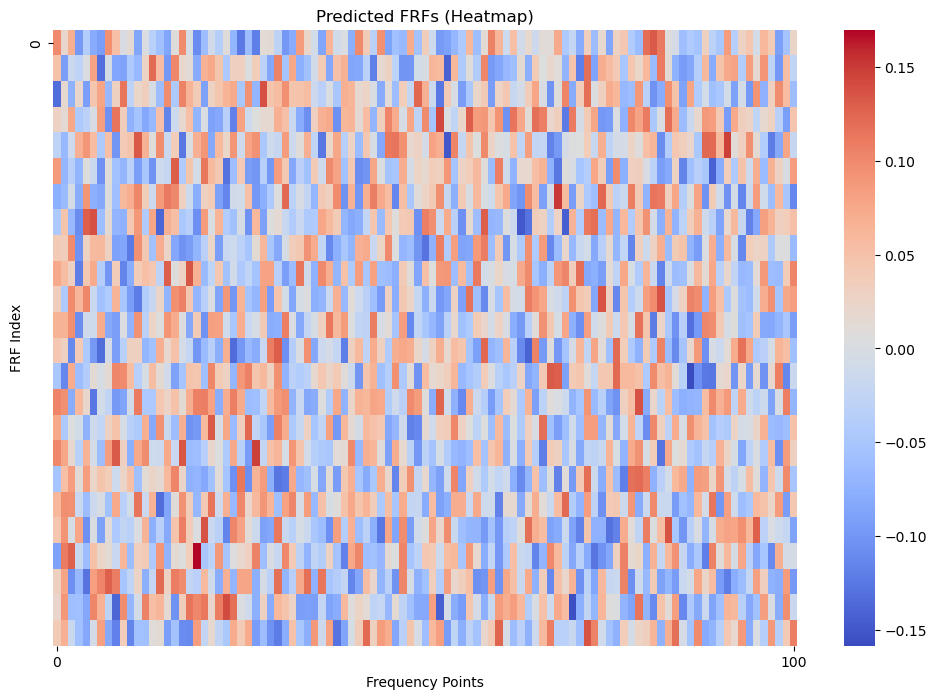

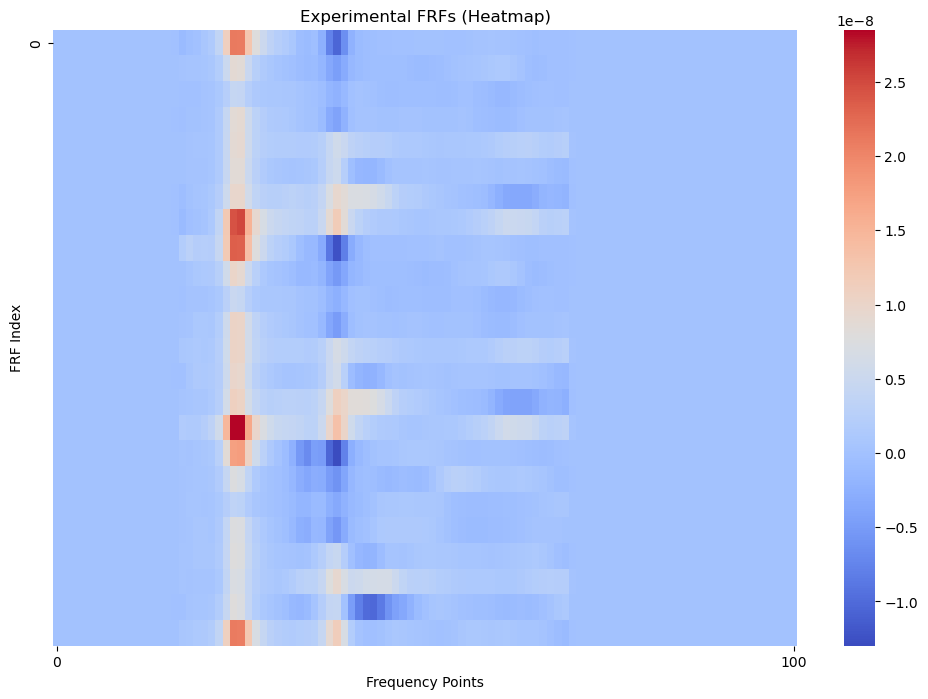

In [25]:
import seaborn as sns

predicted_frf = predicted_frf.detach().numpy()  # Convert tensor to NumPy array
experimental_frf = frfs_experimental_normalized_flat.detach().numpy()  # Convert tensor to NumPy array

# Assuming you have the experimental and predicted FRFs as [24, 100] shaped arrays
# Reshape them to create heatmaps
predicted_frf = predicted_frf.reshape(24, 101)
experimental_frf = frfs_experimental.reshape(24, 101)

# Plot the heatmap for predicted FRF
plt.figure(figsize=(12, 8))
sns.heatmap(predicted_frf, cmap='coolwarm', xticklabels=100, yticklabels=24)
plt.title('Predicted FRFs (Heatmap)')
plt.xlabel('Frequency Points')
plt.ylabel('FRF Index')
plt.show()

# Plot the heatmap for experimental FRF
plt.figure(figsize=(12, 8))
sns.heatmap(experimental_frf, cmap='coolwarm', xticklabels=100, yticklabels=24)
plt.title('Experimental FRFs (Heatmap)')
plt.xlabel('Frequency Points')
plt.ylabel('FRF Index')
plt.show()


In [118]:
from Simulation_PyAPDL import simulation_PyAPDL
from sklearn.cluster import DBSCAN
from scipy.stats import mode
from scipy.integrate import simps
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import json
import os
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import spearmanr
from IPython.display import clear_output

In [119]:
simu_tk = simulation_PyAPDL(nproc=4,nerr=10000)
simu_tk.launch_engine()
simu_tk.mapdl.clear()

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Launch Pymapdl
     Launch Pymapdl successfully, duration 14.2406 seconds.


In [121]:


DOE_info = {}
vary_ratio = 0.5

x_best1 =  [ 1.0,        0.5,       0.5,           0,         0.5,        0.68722604,
            0.5,        0.5,       0.69845997,    0,         0.85229155, 0.5,
            0.5,        0.5,       0.5,           0.5,       0.5,        0.6,
            0.59828352]

x_best2 = [ 0.88901592, 0.27044889, 0.28554261, 0.01408451, 0.27367161, 0.7319021,
            0.72747765, 0.41692908, 0.21476516, 0.25659874, 0.61753642, 0.7479544,
            0.7999774 , 0.40522151, 0.62167283, 0.75864746, 0.65032564, 0.5237532,
            0.66511448]

final_predicted_params= np.insert(final_predicted_params, 15, 0.5)  # Insert value at index 14
final_predicted_params = np.insert(final_predicted_params, 16, 0.5)  # Insert value at index 15

x_best = final_predicted_params
#x_best = np.array(x_best2)
# Transform X from [0,1] to [-1,1]
#X_transformed = 2 * result.x - 1
X_transformed = 2 * x_best - 1
X_transformed = X_transformed.reshape(-1,1)
X_transformed = np.transpose(X_transformed)
i_doe = 0
X_doe_transformed = X_transformed

# Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
# Parameter list    = [ vs,   rho,   nu ]
t_para   = np.array([ 0.468+ vary_ratio*(0.468)*X_transformed[i_doe,0],
                      0.8  + vary_ratio*(0.8  )*X_transformed[i_doe,1],
                      0.05 + vary_ratio*(0.05 )*X_transformed[i_doe,2],
                      0.2  + vary_ratio*(0.2  )*X_transformed[i_doe,3],
                      0.2  + vary_ratio*(0.2  )*X_transformed[i_doe,4],
                      0.468+ vary_ratio*(0.468)*X_transformed[i_doe,0]])
#
e_para   = np.array([ 20e9 + vary_ratio*20e9*X_transformed[i_doe,5],
                      20e9 + vary_ratio*20e9*X_transformed[i_doe,6],
                      20e9 + vary_ratio*20e9*X_transformed[i_doe,7],
                      20e9 + vary_ratio*20e9*X_transformed[i_doe,8],
                      20e9 + vary_ratio*20e9*X_transformed[i_doe,9],
                      20e9 + vary_ratio*20e9*X_transformed[i_doe,5]])
#
nu_para  = np.array([ 0.27,
                      0.27,
                      0.27,
                      0.27,
                      0.27,
                      0.27])
#
rho_para = np.array([ 2300 + vary_ratio*2300*X_transformed[i_doe,10],
                      2300 + vary_ratio*2300*X_transformed[i_doe,11],
                      2300 + vary_ratio*2300*X_transformed[i_doe,12],
                      2300 + vary_ratio*2300*X_transformed[i_doe,13],
                      2300 + vary_ratio*2300*X_transformed[i_doe,14],
                      2300 + vary_ratio*2300*X_transformed[i_doe,10]])
#
soil_para = np.array([ 350  + vary_ratio*(350 )*X_transformed[i_doe,15],
                       1400 + vary_ratio*(1400)*X_transformed[i_doe,16],
                       0.33 ])
#
height_b            = 3.37 + vary_ratio*3.37*X_transformed[i_doe,17]
damp_ratio_b        = 0.045+ 0.01*X_transformed[i_doe,18]
tol = 0.3

# Start the simulation 
simu_tk.mapdl.clear()
simu_tk.setting_parameter(bool_SSI= False,height=height_b, t_arr=t_para, e_arr=e_para, nu_arr=nu_para, rho_arr=rho_para, soil_arr=soil_para)
simu_tk.build_model()
# Excitation point: Hammer 2.1 Pos1 (close to edge)
simu_tk.mapdl.nsel('S','LOC','Z',simu_tk.height*2)
simu_tk.mapdl.nsel('R','LOC','X',12.776-tol,12.776+tol)
nsel_id_3 = simu_tk.mapdl.nsel('R','LOC','Y',2.748-tol,2.748+tol)
simu_tk.mapdl.nsel('ALL')
# Apply the force on selected node and solve 
simu_tk.solve_model(Solu_type=6, N_modes = 40, Freq_Incr=1, End_Freq=50,Damping_ratio= damp_ratio_b, excitation_node=nsel_id_3[1])
modal_info = simu_tk.get_all_modal_info(N_modes_exp=40)
## Get FRF at target point
meas_FRFs_ex221 = simu_tk.get_FRFs_meas_EXAMPLE()
DOE_info_ex221 = {
    'id':i_doe,
    'X':x_best.tolist(),
    'X_trans':X_doe_transformed.tolist(),
    't_info':simu_tk.t_arr.tolist(),
    'e_info':simu_tk.e_arr.tolist(),
    'n_info':simu_tk.nu_arr.tolist(),
    'r_info':simu_tk.rho_arr.tolist(),
    's_info':simu_tk.soil_arr.tolist(),
    'height':simu_tk.height,
    'dr':simu_tk.Damping_ratio,
    'modal_info':modal_info,
    'meas_frf':meas_FRFs_ex221
    }
simu_tk.mapdl.clear()



simu_tk.setting_parameter(bool_SSI= False,height=height_b, t_arr=t_para, e_arr=e_para, nu_arr=nu_para, rho_arr=rho_para, soil_arr=soil_para)
simu_tk.build_model()
# Excitation point: Hammer 2.0 Pos2 (sensor)
simu_tk.mapdl.nsel('S','LOC','Z',simu_tk.height*2)
simu_tk.mapdl.nsel('R','LOC','X',7.19-tol,7.19+tol)
nsel_id_2 = simu_tk.mapdl.nsel('R','LOC','Y',8.14-tol,8.14+tol)
simu_tk.mapdl.nsel('ALL')
# Apply the force on selected node and solve 
simu_tk.solve_model(Solu_type=6, N_modes = 40, Freq_Incr=1, End_Freq=50,Damping_ratio= damp_ratio_b, excitation_node=nsel_id_2[1])
modal_info = simu_tk.get_all_modal_info(N_modes_exp=40)
## Get FRF at target point
meas_FRFs_ex220 = simu_tk.get_FRFs_meas_EXAMPLE()
DOE_info_ex220 = {
    'id':i_doe,
    'X':x_best.tolist(),
    'X_trans':X_doe_transformed.tolist(),
    't_info':simu_tk.t_arr.tolist(),
    'e_info':simu_tk.e_arr.tolist(),
    'n_info':simu_tk.nu_arr.tolist(),
    'r_info':simu_tk.rho_arr.tolist(),
    's_info':simu_tk.soil_arr.tolist(),
    'height':simu_tk.height,
    'dr':simu_tk.Damping_ratio,
    'modal_info':modal_info,
    'meas_frf':meas_FRFs_ex220
    }
simu_tk.mapdl.clear()



simu_tk.setting_parameter(bool_SSI= False,height=height_b, t_arr=t_para, e_arr=e_para, nu_arr=nu_para, rho_arr=rho_para, soil_arr=soil_para)
simu_tk.build_model()
# Excitation point: Hammer 2.0 Pos1 (shaker)
simu_tk.mapdl.nsel('S','LOC','Z',simu_tk.height*2)
simu_tk.mapdl.nsel('R','LOC','X',9.3-tol,9.3+tol)
nsel_id_1 = simu_tk.mapdl.nsel('R','LOC','Y',5.9-tol,5.9+tol)
simu_tk.mapdl.nsel('ALL')
# Apply the force on selected node and solve 
simu_tk.solve_model(Solu_type=6, N_modes = 40, Freq_Incr=1, End_Freq=50,Damping_ratio= damp_ratio_b, excitation_node=nsel_id_1[1])
modal_info = simu_tk.get_all_modal_info(N_modes_exp=40)
## Get FRF at target point
meas_FRFs_ex22 = simu_tk.get_FRFs_meas_EXAMPLE()
DOE_info_ex22 = {
    'id':i_doe,
    'X':x_best.tolist(),
    'X_trans':X_doe_transformed.tolist(),
    't_info':simu_tk.t_arr.tolist(),
    'e_info':simu_tk.e_arr.tolist(),
    'n_info':simu_tk.nu_arr.tolist(),
    'r_info':simu_tk.rho_arr.tolist(),
    's_info':simu_tk.soil_arr.tolist(),
    'height':simu_tk.height,
    'dr':simu_tk.Damping_ratio,
    'modal_info':modal_info,
    'meas_frf':meas_FRFs_ex22
    }

simu_tk.mapdl.clear()
clear_output(wait=True)

print(DOE_info_ex22['t_info'])
print(DOE_info_ex22['e_info'])
print(DOE_info_ex22['r_info'])
print(DOE_info_ex22['s_info'])
print(DOE_info_ex22['height'])
print(DOE_info_ex22['dr'])




[0.47281143665313724, 1.0606792449951172, 0.03219219446182251, 0.14623835086822512, 0.1678782939910889, 0.47281143665313724]
[15289676189.422607, 15392873287.200928, 26514345407.485962, 17830781936.645508, 10476368069.648743, 15289676189.422607]
[1349.588131904602, 1414.3764346837997, 2015.9505724906921, 1841.5632724761963, 3021.1426436901093, 1349.588131904602]
[350.0, 1400.0, 0.33]
3.5017502987384796
0.039188817739486695


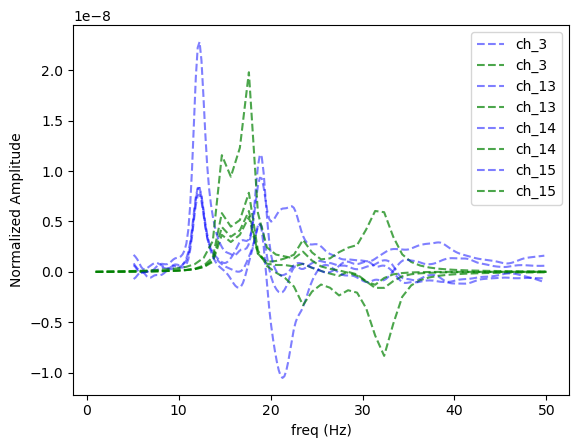

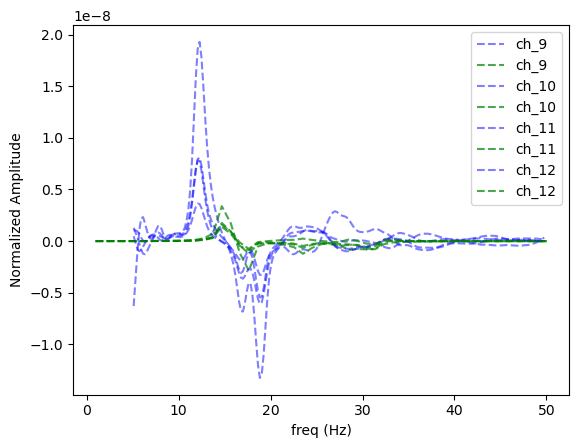

In [123]:
i_file = 9
#i_pos = 3
i_pos_1OG = [3,13,14,15]
cut_freq_low = 5
cut_freq_high = 50

f_1OG  = []
r_1OG  = []
i_1OG  = []


for i in range(4):
    i_pos = i_pos_1OG[i]
    directory = r"D:/MDSI_project/MATLAB/Surrogate_main/FRF"
    filename = f"FRF_test_{i_file}_ch_{i_pos}.mat"
    full_path = os.path.join(directory, filename)

    frf_data = sio.loadmat(full_path)
    f = np.array([frf_data["freq_"]])[0]
    r = np.array([frf_data["real_"]])[0]
    i = np.array([frf_data["imag_"]])[0]

    indices = np.where((f > cut_freq_low ) & (f < cut_freq_high))[0]
    id_last = indices[-1] 
    id_start = indices[0] 
    
    f = f[id_start:id_last]
    r = r[id_start:id_last]
    i = i[id_start:id_last]

    f_1OG.append(f.reshape(1, -1))  # Ensure shape is (1, N)
    r_1OG.append(r.reshape(1, -1))  # Ensure shape is (1, N)
    i_1OG.append(i.reshape(1, -1))  # Ensure shape is (1, N)

    f_1OG_mat = np.vstack(f_1OG)
    r_1OG_mat = np.vstack(r_1OG)
    i_1OG_mat = np.vstack(i_1OG)
    #i_1OG_mat = np.sqrt(np.power(i_1OG_mat,2)+np.power(r_1OG_mat,2))

max_i = np.max(abs(i_1OG_mat))
i_1OG_mat_norm = i_1OG_mat

for i in range(4):
    i_pos = i_pos_1OG[i]
    f_ = f_1OG_mat[i,:]
    i_norm = i_1OG_mat_norm[i,:]
    plt.plot(f_,i_norm, label=f"ch_{i_pos}",linestyle="--",color='blue', alpha=0.5)
    plt.plot(meas_FRFs_ex221[f'disp_ch{i_pos_1OG[i]}']['freq'], meas_FRFs_ex221[f'disp_ch{i_pos_1OG[i]}']['imag'], label=f"ch_{i_pos}",linestyle="--",color='green', alpha=0.7)
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("Normalized Amplitude")
plt.show()


i_pos_1OG = [9,10,11,12]
f_1OG  = []
r_1OG  = []
i_1OG  = []
for i in range(4):
    i_pos = i_pos_1OG[i]
    directory = r"D:/MDSI_project/MATLAB/Surrogate_main/FRF"
    filename = f"FRF_test_{i_file}_ch_{i_pos}.mat"
    full_path = os.path.join(directory, filename)

    frf_data = sio.loadmat(full_path)
    f = np.array([frf_data["freq_"]])[0]
    r = np.array([frf_data["real_"]])[0]
    i = np.array([frf_data["imag_"]])[0]

    indices = np.where((f > cut_freq_low ) & (f < cut_freq_high))[0]
    id_last = indices[-1] 
    id_start = indices[0] 
    
    f = f[id_start:id_last]
    r = r[id_start:id_last]
    i = i[id_start:id_last]

    f_1OG.append(f.reshape(1, -1))  # Ensure shape is (1, N)
    r_1OG.append(r.reshape(1, -1))  # Ensure shape is (1, N)
    i_1OG.append(i.reshape(1, -1))  # Ensure shape is (1, N)

    f_1OG_mat = np.vstack(f_1OG)
    r_1OG_mat = np.vstack(r_1OG)
    i_1OG_mat = np.vstack(i_1OG)
    #i_1OG_mat = np.sqrt(np.power(i_1OG_mat,2)+np.power(r_1OG_mat,2))

max_i = np.max(abs(i_1OG_mat))
i_1OG_mat_norm = i_1OG_mat

for i in range(4):
    i_pos = i_pos_1OG[i]
    f_ = f_1OG_mat[i,:]
    i_norm = i_1OG_mat_norm[i,:]
    plt.plot(f_,i_norm, label=f"ch_{i_pos}",linestyle="--",color='blue', alpha=0.5)
    plt.plot(meas_FRFs_ex221[f'disp_ch{i_pos_1OG[i]}']['freq'], meas_FRFs_ex221[f'disp_ch{i_pos_1OG[i]}']['imag'], label=f"ch_{i_pos}",linestyle="--",color='green', alpha=0.7)
plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("Normalized Amplitude")
plt.show()

directory = r"D:/MDSI_project/MATLAB/Surrogate_main/FRF/"
filename = f"mode_shape_test_{i_file}.mat"
full_path = os.path.join(directory, filename)

mode_shape_exp = sio.loadmat(full_path)
mode_shape_vector_exp = mode_shape_exp['phi']
mean_fn_1_exp = np.mean(mode_shape_vector_exp[::2,0])
mean_fn_2_exp = np.mean(mode_shape_vector_exp[1::2,0])
mode_1_exp = mode_shape_vector_exp[0::2,2]
mode_2_exp = mode_shape_vector_exp[1::2,2]

